# A2 - Introdução à Ciência de Dados¶

Análise de dados de uma base de estadias em hotéis da Europa com 120 entradas.

As perguntas que analisaremos serão:

1. Qual a média de preço?
2. Notas são consistentes entre as cidades?
3. Classificações mais altas resultam em notas mais altas?

## Preparação da Base



### Bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Base

In [3]:
data = pd.read_excel("Hotels.xlsx", engine='openpyxl')
data.head()

,ID,Hotel name,Price(BAM),Hotel star rating,Distance,Customer rating,Rooms,Squares,City
0,1,Europe,139,5,350,8.3,1,25,Sarajevo
1,2,Europe,187,5,350,8.3,2,40,Sarajevo
2,3,Hills,255,5,10000,8.5,3,42,Sarajevo
3,4,Hills,141,5,10000,8.5,2,42,Sarajevo
4,5,Boutique,117,4,450,8.7,1,15,Sarajevo


## Qual a média de preço?

## Notas são consistentes entre as cidades?

Text(0.5, 1.0, 'Ljubljana')

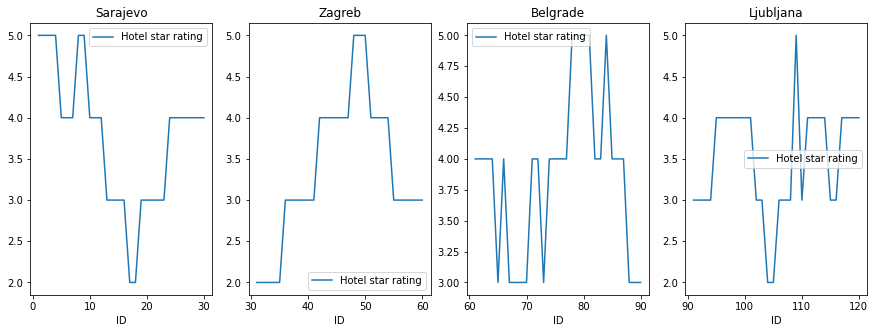

In [13]:
select_city1 = data.loc[data['City'] == 'Sarajevo']
select_city2 = data.loc[data['City'] == 'Zagreb']
select_city3 = data.loc[data['City'] == 'Belgrade']
select_city4 = data.loc[data['City'] == 'Ljubljana']

fig, ax=plt.subplots(1,4,figsize=(15,5))
select_city1.plot(x='ID', y='Hotel star rating', kind='line', ax=ax[0]).set_title('Sarajevo')
select_city2.plot(x='ID', y='Hotel star rating', kind='line', ax=ax[1]).set_title('Zagreb')
select_city3.plot(x='ID', y='Hotel star rating', kind='line', ax=ax[2]).set_title('Belgrade')
select_city4.plot(x='ID', y='Hotel star rating', kind='line', ax=ax[3]).set_title('Ljubljana')

Text(0.5, 1.0, 'Ljubljana')

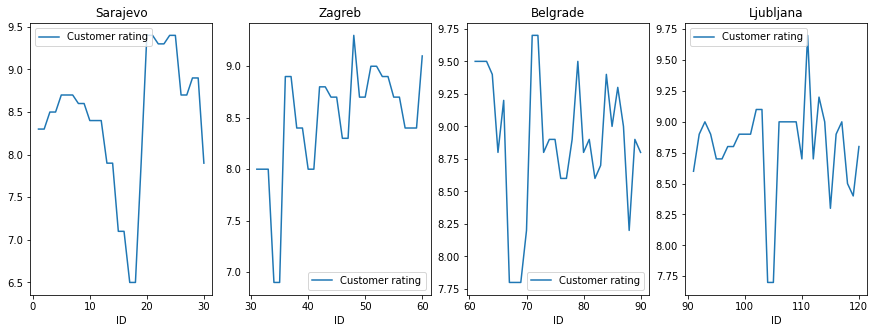

In [10]:
select_city1 = data.loc[data['City'] == 'Sarajevo']
select_city2 = data.loc[data['City'] == 'Zagreb']
select_city3 = data.loc[data['City'] == 'Belgrade']
select_city4 = data.loc[data['City'] == 'Ljubljana']

fig, ax=plt.subplots(1,4,figsize=(15,5)).set_ti
select_city1.plot(x='ID', y='Customer rating', kind='line', ax=ax[0]).set_title('Sarajevo')
select_city2.plot(x='ID', y='Customer rating', kind='line', ax=ax[1]).set_title('Zagreb')
select_city3.plot(x='ID', y='Customer rating', kind='line', ax=ax[2]).set_title('Belgrade')
select_city4.plot(x='ID', y='Customer rating', kind='line', ax=ax[3]).set_title('Ljubljana')

## Classificações mais altas resultam em notas mais altas?

### Contagem dos Hotéis

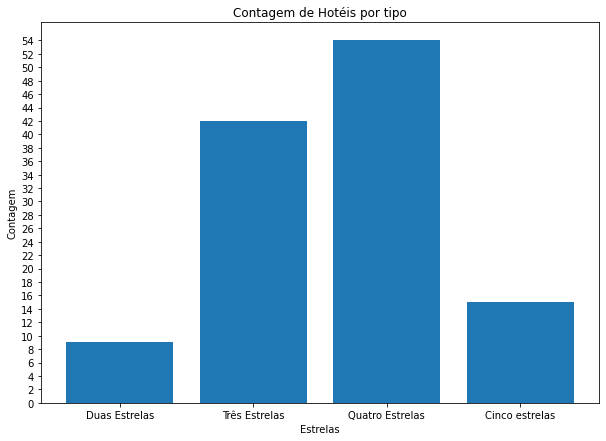

In [19]:
fig, ax = plt.subplots(figsize = (10,7))

ax.bar(x = ["Duas Estrelas", "Três Estrelas", "Quatro Estrelas", "Cinco estrelas"], 
       height = data["Hotel star rating"].value_counts(sort = False))

ax.set(title = "Contagem de Hotéis por tipo", xlabel = "Estrelas", ylabel = "Contagem")

plt.yticks(range(0, max(data["Hotel star rating"].value_counts(sort = False)) + 1, 2))

plt.show()

### Cálculo das médias

In [139]:
def get_average_rating(rating):
    filtered = data[(data["Hotel star rating"] == rating)]
    amount = len(filtered["Customer rating"])
    rating_sum = sum(filtered["Customer rating"])

    return round((rating_sum * 10 / amount))/10

averages = map(lambda n: get_average_rating(n) - 7, [2,3,4,5])


### Gráficos e Resultado

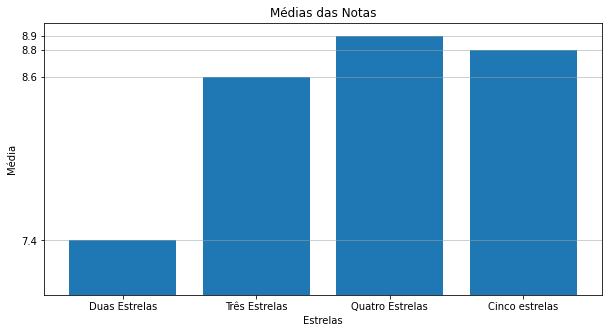

In [140]:
fig, ax = plt.subplots(figsize = (10,5))
ax.bar(x = ["Duas Estrelas", "Três Estrelas", "Quatro Estrelas", "Cinco estrelas"], 
       height = list(averages), bottom=7)

ax.set(title = "Médias das Notas", xlabel = "Estrelas", ylabel = "Média")

plt.yticks([7.4, 8.6, 8.9, 8.8])
plt.grid(color='#95a5a6', linestyle='-', linewidth=1, axis='y', alpha=0.5)
plt.show()

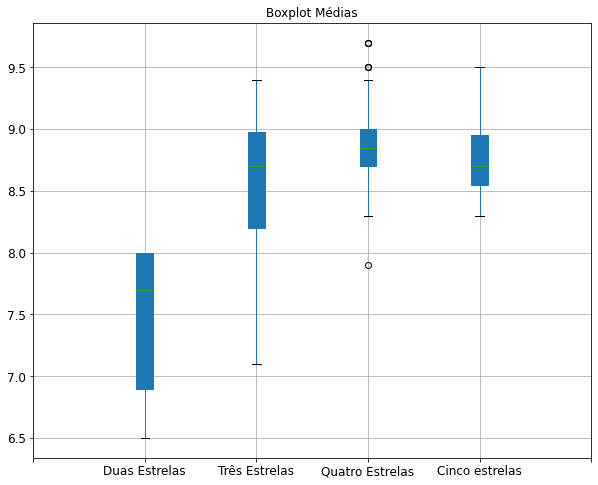

In [141]:
def get_star_filtered_ratings(rating):
    return data[(data["Hotel star rating"] == rating)]["Customer rating"]

fig, ax = plt.subplots(figsize = (10,8))

pd.DataFrame(get_star_filtered_ratings(2)).boxplot(fontsize= 12, positions=[1], patch_artist=True, vert = True)
pd.DataFrame(get_star_filtered_ratings(3)).boxplot(fontsize= 12, positions=[2], patch_artist=True, vert = True)
pd.DataFrame(get_star_filtered_ratings(4)).boxplot(fontsize= 12, positions=[3], patch_artist=True, vert = True)
pd.DataFrame(get_star_filtered_ratings(5)).boxplot(fontsize= 12, positions=[4], patch_artist=True, vert = True)

ticks = ["","Duas Estrelas", "Três Estrelas", "Quatro Estrelas", "Cinco estrelas",""]

plt.xticks(range(0, len(ticks)), ticks)

ax.set(title = "Boxplot Médias");

### Resultado

Mesmo com a média do hotel quatro estrelas maior do que a de cinco estrelas, podemos ver no gráfico acima que <b>hotéis com mais estrelas tendem a ter notas melhores</b>.

A média ligeiramente maior dos hotéis quatro estrelas pode ser explicado pelo fato de haver mais linhas de hotéis quatro estrelas do que cinco.